In [1]:
import chess
import sklearn.ensemble
import pdb

board = chess.Board()

In [2]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [3]:
list(board.legal_moves)

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [4]:
import numpy as np

def piece2vec(piece_str):
    """Converts a string representation of a piece to a one-hot representation"""
    
    piece_dictionary = {'.': 0, #empty position
                        'B': 1, 
                        'K': 2,
                        'N': 3,
                        'P': 4,
                        'Q': 5,
                        'R': 6,
                        'b': 7,
                        'k': 8,
                        'n': 9,
                        'p': 10,
                        'q': 11,
                        'r': 12}
    
    piece_vec = np.zeros(len(piece_dictionary)) > 0
    piece_vec[piece_dictionary[piece_str]] = True
    
    return piece_vec


def board2vec(board):
    """Converts a board object to a 13 pieces x rows x columns one-hot representation"""
    board_state = str(board)

    # print(board_state)
    board_state = board_state.split('\n')
    board_state = [row.split(' ') for row in board_state]

    board_vector = np.zeros([13, 8, 8])

    # for every row
    for i in range(0, len(board_state)):
        #for every column
        for j in range(0, len(board_state[0])):
            piece_str = board_state[i][j]

            board_vector[piece2vec(piece_str), i,j] = 1

    return [board_vector, board.turn]
            
def vec2board(board, turn):    
    """Converts a 13 pieces x rows x columns one-hot representation to a board object"""
#     todo
    pass


def board2vec_next_moves(board):
    """Returns a list of next legal moves as board vectors"""
    
    next_moves_vec = list()
    
    for move in board.legal_moves:
        board_tmp = board.copy()
        board_tmp.push(move)
        
        next_move_vec = board2vec(board_tmp)
        next_moves_vec.append(next_move_vec)
        
    return next_moves_vec
    
def who_won(board):
    """Returns who won 1: white, 0: tie, -1: black"""
    win_dict = {'1-0':1, '1/2-1/2':0, '0-1':-1}
    
    return win_dict[board.result()]

In [5]:
next_moves_vec = board2vec_next_moves(board)


In [6]:
def pick_rando_move(board):
    legal_moves = list(board.legal_moves)
    move_ind = np.random.choice(len(legal_moves))
    
    return legal_moves[move_ind]

class RandoBot(object):
    def __init__(self):
        pass
    
    def choose_move(self, board):
        return pick_rando_move(board)

class SKLearnBot(object):
    def __init__(self, model):
        self.model = model
        
    def choose_move(self, board):
        next_moves_list = board2vec_next_moves(board)
        
        move_scores = np.zeros(len(next_moves_list))
        
        for i in range(0, len(next_moves_list)):
            next_move = next_moves_list[i]
            
            scores[i] = self.model.predict(next_move)
            
        ind = np.argmax(scores)
        
        return list(board.legal_moves)[ind]
                                       
    def train_from_board(self, board):
#       need to finish
        
        move_list = list()
        
        winner = who_won(board);
        
        isempty = False
        c = 0
        while not isempty:
            c+=1
            move_list.append(board2vec(board))
            try:
                board.pop()
            except:
                isempty = True
            
        pdb.set_trace()

        

In [7]:
def play_game(board, player1, player2, verbose=False):
    players = [player1, player2]
    
    turn = 0
    while not board.is_game_over():
        if verbose: print(turn)
        
        moving_player = players[board.turn]
        move = moving_player.choose_move(board)
        board.push(move)
        
        turn +=1
        
    return board, turn

241
1


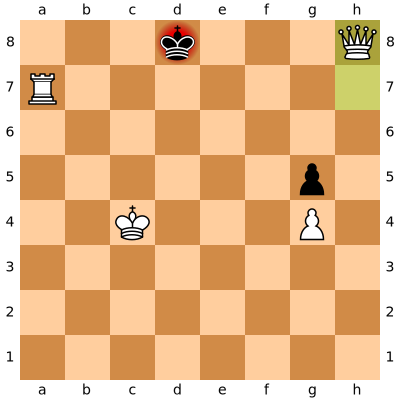

In [10]:
p1 = RandoBot()

board = chess.Board()
final_board, turn = play_game(board, p1, p1)

print(turn)
print(who_won(final_board))

final_board

In [ ]:
p_bot = SKLearnBot(sklearn.ensemble.RandomForestClassifier(n_estimators=100))

p_bot.train_from_board(final_board)

